<a href="https://colab.research.google.com/github/janjibDEV/Titanic_Kaggle/blob/main/c1_titanic_2022_0_76.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
# load training data
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
# since passenger id is unique, the id column is not needed
del df['PassengerId']
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
# separate label from features
y = df['Survived']
del df['Survived']

In [7]:
df['Pclass'].describe()

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

In [8]:
# since name column is unique, the column is not needed
del df['Name']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d1c2276d0>]],
      dtype=object)

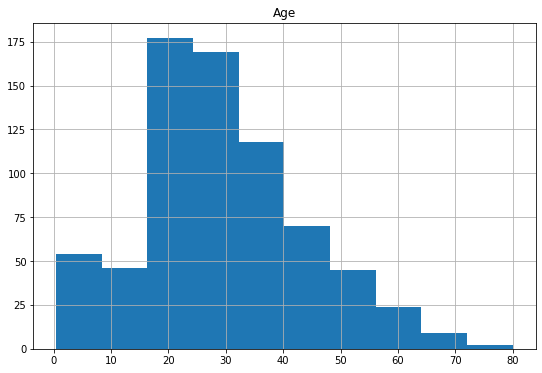

In [9]:
df['Age'].describe()
df.hist(column='Age',figsize=(9,6))

In [10]:
import math
age_mean = math.floor(df['Age'].mean())

df['Age'] = df['Age'].fillna(age_mean)
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    29.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [11]:
# almost all tickets are unique, so the column is not needed
del df['Ticket']

In [12]:
df['Fare'].describe()
# will scaled

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d1c18c6d0>]],
      dtype=object)

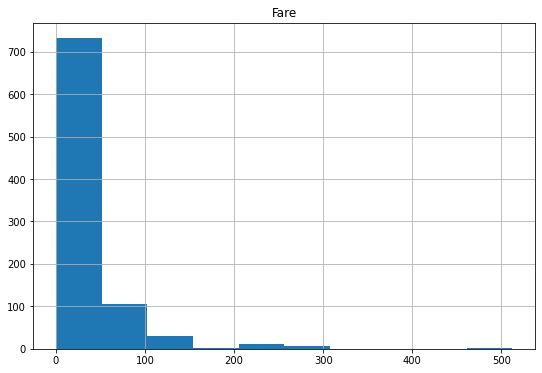

In [13]:
df.hist(column='Fare',figsize=(9,6))

In [14]:
fare_mode = df['Fare'].mode()

In [15]:
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,NaN,S
887,1,female,19.0,0,0,30.0000,B42,S
888,3,female,29.0,1,2,23.4500,NaN,S
889,1,male,26.0,0,0,30.0000,C148,C


In [16]:
# cabin column has too many null values, and uniques, so the column is not needed
del df['Cabin']

In [17]:
q = pd.Categorical(df['Embarked'])
q.describe()

,counts,freqs
categories,,
C,168,0.188552
Q,77,0.086420
S,644,0.722783
NaN,2,0.002245


In [18]:
# replace null values with most frequent value: S
df['Embarked'] = df['Embarked'].fillna('S')
q = pd.Categorical(df['Embarked'])
q.describe()

,counts,freqs
categories,,
C,168,0.188552
Q,77,0.086420
S,646,0.725028


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(df,y,random_state = 42)

In [20]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
298,1,male,29.00,0,0,30.5000,S
884,3,male,25.00,0,0,7.0500,S
247,2,female,24.00,0,2,14.5000,S
478,3,male,22.00,0,0,7.5208,S
305,1,male,0.92,1,2,151.5500,S
...,...,...,...,...,...,...,...
106,3,female,21.00,0,0,7.6500,S
270,1,male,29.00,0,0,31.0000,S
860,3,male,41.00,2,0,14.1083,S
435,1,female,14.00,1,2,120.0000,S


In [21]:
# hot encode sex, embarked
enc_column = ['Sex','Embarked']

from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore',sparse=False)
OH_cols_train = pd.DataFrame(enc.fit_transform(X_train[enc_column]))
OH_cols_valid = pd.DataFrame(enc.transform(X_valid[enc_column]))

OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

num_x_train = X_train.drop(enc_column,axis=1)
num_x_valid = X_valid.drop(enc_column,axis=1)

OH_X_train = pd.concat([num_x_train,OH_cols_train],axis=1)
OH_X_valid = pd.concat([num_x_valid,OH_cols_valid],axis=1)

OH_X_train

,Pclass,Age,SibSp,Parch,Fare,0,1,2,3,4
298,1,29.00,0,0,30.5000,0.0,1.0,0.0,0.0,1.0
884,3,25.00,0,0,7.0500,0.0,1.0,0.0,0.0,1.0
247,2,24.00,0,2,14.5000,1.0,0.0,0.0,0.0,1.0
478,3,22.00,0,0,7.5208,0.0,1.0,0.0,0.0,1.0
305,1,0.92,1,2,151.5500,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
106,3,21.00,0,0,7.6500,1.0,0.0,0.0,0.0,1.0
270,1,29.00,0,0,31.0000,0.0,1.0,0.0,0.0,1.0
860,3,41.00,2,0,14.1083,0.0,1.0,0.0,0.0,1.0
435,1,14.00,1,2,120.0000,1.0,0.0,0.0,0.0,1.0


In [22]:
# scale Fare
from sklearn.preprocessing import StandardScaler

col_names = ['Fare']

scaled_train = OH_X_train.copy()
scaled_valid = OH_X_valid.copy()

features_train = scaled_train[col_names]
features_valid = scaled_valid[col_names]

scaler = StandardScaler().fit(features_train.values)
features_train = scaler.transform(features_train.values)
features_valid = scaler.transform(features_valid.values)

scaled_train[col_names] = features_train
scaled_valid[col_names] = features_valid

scaled_train

,Pclass,Age,SibSp,Parch,Fare,0,1,2,3,4
298,1,29.00,0,0,-0.032568,0.0,1.0,0.0,0.0,1.0
884,3,25.00,0,0,-0.487331,0.0,1.0,0.0,0.0,1.0
247,2,24.00,0,2,-0.342854,1.0,0.0,0.0,0.0,1.0
478,3,22.00,0,0,-0.478201,0.0,1.0,0.0,0.0,1.0
305,1,0.92,1,2,2.314937,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
106,3,21.00,0,0,-0.475695,1.0,0.0,0.0,0.0,1.0
270,1,29.00,0,0,-0.022872,0.0,1.0,0.0,0.0,1.0
860,3,41.00,2,0,-0.350450,0.0,1.0,0.0,0.0,1.0
435,1,14.00,1,2,1.703093,1.0,0.0,0.0,0.0,1.0


In [24]:
# build ml model: xgbclassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

rf_cl = RandomForestClassifier(random_state=0)

grid_search = GridSearchCV(estimator = rf_cl, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# train model
grid_search.fit(scaled_train,y_train)



Fitting 3 folds for each of 288 candidates, totalling 864 fits


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [25]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 100}

In [26]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=80, max_features=3, min_samples_leaf=5,
                       min_samples_split=12, random_state=0)

In [29]:
rf_cl2 = RandomForestClassifier(max_depth=80, max_features=3, min_samples_leaf=5,
                       min_samples_split=12, random_state=0)
# fit
rf_cl2.fit(scaled_train,y_train)
# predict
pred = rf_cl2.predict(scaled_valid)

from sklearn.metrics import accuracy_score

acc = accuracy_score(y_valid,pred)
acc

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.820627802690583

In [30]:
# load test data
tf = pd.read_csv('test.csv')
tf

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [31]:
# delete useless columns
del tf['PassengerId']
del tf['Name']
del tf['Ticket']
del tf['Cabin']


In [32]:
tf

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [33]:
tf['Age'] = tf['Age'].fillna(age_mean)

In [34]:
OH_cols_test = pd.DataFrame(enc.transform(tf[enc_column]))

OH_cols_test.index = tf.index

num_x_test = tf.drop(enc_column,axis=1)

OH_X_test = pd.concat([num_x_test,OH_cols_test],axis=1)

OH_X_test

,Pclass,Age,SibSp,Parch,Fare,0,1,2,3,4
0,3,34.5,0,0,7.8292,0.0,1.0,0.0,1.0,0.0
1,3,47.0,1,0,7.0000,1.0,0.0,0.0,0.0,1.0
2,2,62.0,0,0,9.6875,0.0,1.0,0.0,1.0,0.0
3,3,27.0,0,0,8.6625,0.0,1.0,0.0,0.0,1.0
4,3,22.0,1,1,12.2875,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
413,3,29.0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0
414,1,39.0,0,0,108.9000,1.0,0.0,1.0,0.0,0.0
415,3,38.5,0,0,7.2500,0.0,1.0,0.0,0.0,1.0
416,3,29.0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0


In [35]:
OH_X_test['Fare'] = OH_X_test['Fare'].fillna(fare_mode)
OH_X_test.at[152, 'Fare'] = fare_mode

In [36]:
# scale fare
scaled_test = OH_X_test.copy()

features_test = scaled_test[col_names]

features_test = scaler.transform(features_test.values)

scaled_test[col_names] = features_test

scaled_test

,Pclass,Age,SibSp,Parch,Fare,0,1,2,3,4
0,3,34.5,0,0,-0.472220,0.0,1.0,0.0,1.0,0.0
1,3,47.0,1,0,-0.488300,1.0,0.0,0.0,0.0,1.0
2,2,62.0,0,0,-0.436182,0.0,1.0,0.0,1.0,0.0
3,3,27.0,0,0,-0.456060,0.0,1.0,0.0,0.0,1.0
4,3,22.0,1,1,-0.385761,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
413,3,29.0,0,0,-0.467938,0.0,1.0,0.0,0.0,1.0
414,1,39.0,0,0,1.487832,1.0,0.0,1.0,0.0,0.0
415,3,38.5,0,0,-0.483452,0.0,1.0,0.0,0.0,1.0
416,3,29.0,0,0,-0.467938,0.0,1.0,0.0,0.0,1.0


In [37]:
np.where(scaled_test.isnull())

(array([], dtype=int64), array([], dtype=int64))

In [38]:
scaled_test.iloc[152]

Pclass     3.000000
Age       60.500000
SibSp      0.000000
Parch      0.000000
Fare      -0.467938
0          0.000000
1          1.000000
2          0.000000
3          0.000000
4          1.000000
Name: 152, dtype: float64

In [39]:
my_pred = rf_cl2.predict(scaled_test)
my_pred

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [40]:
# load sample submission
ss = pd.read_csv('gender_submission.csv')
ss

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [41]:
ss['Survived'] = my_pred
ss

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [42]:
ss.to_csv('submission.csv',index=False)